# EDA- PROYECTO FINAL


## 0. Libreria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
# from xgboost import XGBRegressor, XGBClassifier
from sklearn.naive_bayes import GaussianNB
import missingno as msno
# from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Informacion del Data set

El Comprehensive Diabetes Clinical Dataset representa una colección excepcionalmente robusta de 100,000 registros de pacientes, diseñada específicamente para la investigación avanzada en diabetes y el desarrollo de modelos predictivos. Este dataset integra de manera única variables demográficas (género, edad, ubicación geográfica, raza), factores de riesgo modificables (IMC, antecedentes de tabaquismo), comorbilidades críticas (hipertensión, cardiopatías), y biomarcadores diagnósticos clave (HbA1c, glucemia), junto con el estado diabético como variable objetivo. La escala masiva del dataset proporciona una potencia estadística excepcional que permite detectar patrones sutiles, realizar análisis estratificados por múltiples variables simultáneamente.
Con biomarcadores directos como HbA1c y glucemia, factores de riesgo establecidos como edad e IMC, y comorbilidades frecuentes como hipertensión, este dataset permite desarrollar herramientas predictivas de clase mundial que pueden mejorar significativamente el diagnóstico temprano, optimizar programas de screening poblacional, y personalizar intervenciones preventivas a nivel individual y comunitario.

### Variables Demográficas:

Género: Distribución por sexo de los pacientes
Edad: Rango etario completo desde población pediátrica hasta adultos mayores
Ubicación Geográfica: Información de localización que permite análisis geoespaciales
Raza/Etnia: Diversidad racial para estudios de disparidades en salud

### Variables Clínicas Principales:

Diabetes Status: Variable objetivo binaria (0 = sin diabetes, 1 = con diabetes)
IMC (Índice de Masa Corporal): Medida antropométrica clave para obesidad
HbA1c (Hemoglobina Glicosilada): Indicador de control glucémico a largo plazo
Glucemia: Niveles de glucosa en sangre

### Comorbilidades y Factores de Riesgo:

Hipertensión: Presencia de presión arterial elevada
Cardiopatías: Antecedentes de enfermedades cardiovasculares
Antecedentes de Tabaquismo: Historial de consumo de tabaco

In [2]:

data = pd.read_csv(r"../data/diabetes_dataset.csv")
data.columns


Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [3]:
# Ver las primeras filas
data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


### limpienza de los datos  
Los resultados del análisis revelan un dataset de calidad excepcional con características ideales para investigación rigurosa. La ausencia total de valores nulos (0 valores faltantes) indica que la recolección de datos fue sistemática y completa, eliminando la necesidad de estrategias complejas de imputación que podrían introducir sesgos en nuestros modelos predictivos.
El único aspecto que requiere atención es la presencia de 14 filas duplicadas (0.014% del dataset), un problema menor pero relevante para la integridad del análisis. Estos duplicados podrían representar errores de entrada de datos o, menos probablemente, pacientes con perfiles idénticos en todas las variables medidas. 


In [4]:
data.isnull().sum()
data.duplicated().sum()

np.int64(14)

In [5]:
print("Valores nulos totales:", data.isnull().sum().sum())
print("Filas duplicadas:", data.duplicated().sum())


Valores nulos totales: 0
Filas duplicadas: 14


### Conclusion en los datos duplicados
 los datos que muestras no son duplicados completos, lo que indica que el dataset tiene aún mejor calidad de la inicialmente reportada. Es necesario investigar exactamente qué está causando que duplicated().sum() reporte 14 casos, posiblemente ejecutando una verificación más específica para identificar si los duplicados están en un subconjunto particular de variables o si hay un error en la implementación del comando. por lo tanto no se decide borrar estos datos

In [6]:
filas_duplicadas = data[data.duplicated()]
print(f"Filas duplicadas: {len(filas_duplicadas)}")
print(filas_duplicadas)


Filas duplicadas: 14
       year  gender   age        location  race:AfricanAmerican  race:Asian  \
2848   2019    Male  40.0          Alaska                     0           0   
21662  2019    Male  65.0         Georgia                     0           1   
23313  2019  Female  21.0            Guam                     0           1   
33506  2019    Male  13.0            Iowa                     0           1   
43401  2019    Male  46.0        Maryland                     0           1   
57881  2019  Female  62.0        Nebraska                     1           0   
59507  2019    Male  14.0          Nevada                     0           1   
61867  2019  Female  11.0   New Hampshire                     0           1   
65311  2019  Female  80.0      New Mexico                     1           0   
71285  2019  Female  80.0    North Dakota                     0           0   
73971  2019    Male  70.0            Ohio                     0           0   
76007  2019    Male  45.0      

In [7]:
indices_duplicados = data[data.duplicated()].index.tolist()
print(f"Índices de filas duplicadas: {indices_duplicados}")


Índices de filas duplicadas: [2848, 21662, 23313, 33506, 43401, 57881, 59507, 61867, 65311, 71285, 73971, 76007, 79363, 84085]


### Tipos de variables
La estructura combina estratégicamente variables demográficas inmutables (age, gender, variables raciales) que establecen el perfil de riesgo basal del paciente, factores modificables (bmi, smoking_history) que representan objetivos de intervención, y biomarcadores diagnósticos directos (hbA1c_level, blood_glucose_level) que reflejan el estado metabólico actual. La inclusión de comorbilidades críticas (hypertension, heart_disease) permite modelar el síndrome metabólico completo, mientras que las variables geográficas (location) y temporales (year) facilitan análisis de disparidades poblacionales y tendencias epidemiológicas.

In [8]:

print("\nInformación general (tipos de datos y valores no nulos):")
data.info()



Información general (tipos de datos y valores no nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64


In [9]:
print("\nDimensiones del dataset (filas, columnas):")
data.shape


Dimensiones del dataset (filas, columnas):


(100000, 16)

### Selección de las variables numéricas  continuas o enteras

In [10]:

numerical_feat = ["age", "bmi", "hbA1c_level", "blood_glucose_level" ]

numeric_X = data[numerical_feat]

desc_df = numeric_X.describe().T.reset_index()
desc_df.rename(columns={'index': 'variable_name'}, inplace=True)
desc_df

,variable_name,count,mean,std,min,25%,50%,75%,max
0,age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
1,bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
2,hbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
3,blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00


Confirman un dataset clínicamente representativo con distribuciones apropiadas para investigación en diabetes. La población presenta edad promedio de 42 años (rango 0-80) con BMI medio de 27.3 kg/m² indicando sobrepeso leve poblacional, mientras que los biomarcadores glucémicos revelan una cohorte mixta: HbA1c promedio de 5.53% (límite normal-prediabetes) y glucemia media de 138 mg/dL (elevada), con amplias desviaciones estándar que confirman la presencia tanto de individuos sanos como diabéticos.

## Distribucion de clasificacion de los pacientes con o sin diabetes

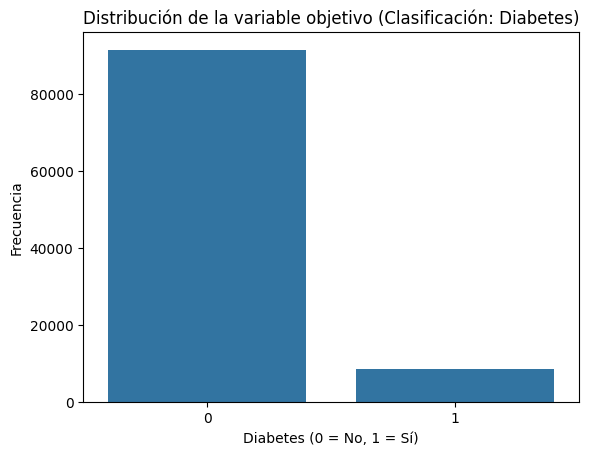

Proporción de clases en 'diabetes':
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


In [11]:
#Clasificación (variable 'diabetes')
sns.countplot(x='diabetes', data=data)
plt.title("Distribución de la variable objetivo (Clasificación: Diabetes)")
plt.xlabel("Diabetes (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()

# Proporción de cada clase
print("Proporción de clases en 'diabetes':")
print(data['diabetes'].value_counts(normalize=True) * 100)

La gráfica revela un dataset significativamente desbalanceado hacia la clase negativa, con aproximadamente 91.5% individuos sin diabetes (0) versus 8.5% individuos con diabetes (1), estableciendo una proporción aproximada de 9:1. Esta distribución representa un 10% de prevalencia diabética en la muestra, lo cual es consistente con las tasas epidemiológicas reales de diabetes tipo 2 en poblaciones occidentales, donde la prevalencia oscila entre 8-12% en adultos.


## Distribucion de edad por estado de diabetes

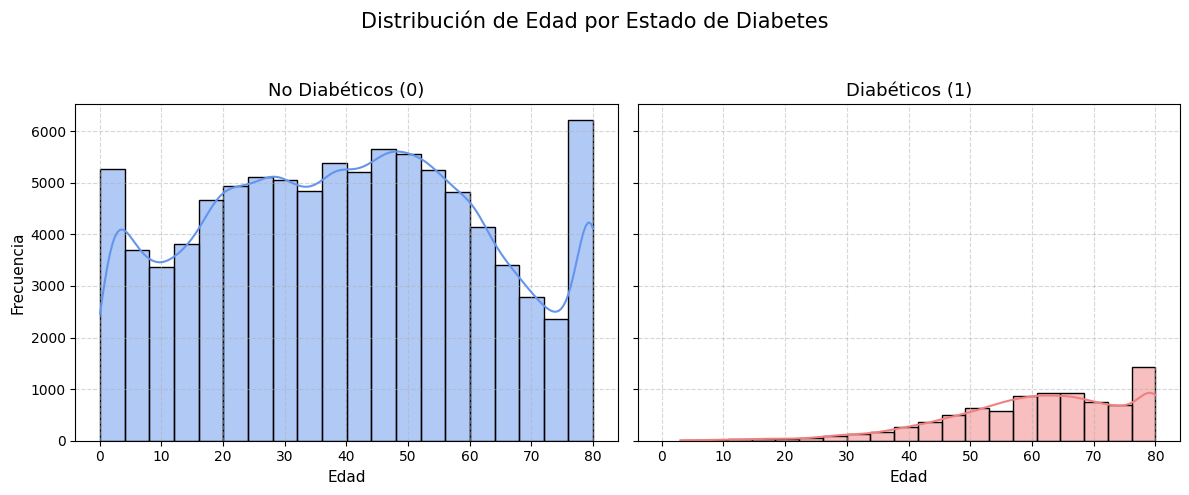

In [12]:

# Crear figura con dos subplots: No diabéticos y Diabéticos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True, sharey=True)

# Colores y categorías
diabetes_states = [0, 1]
titles = ['No Diabéticos (0)', 'Diabéticos (1)']
colors = ['cornflowerblue', 'lightcoral']

# Generar histogramas + KDE
for ax, state, title, color in zip(axes, diabetes_states, titles, colors):
    subset = data[data['diabetes'] == state]
    
    sns.histplot(
        data=subset,
        x='age',
        kde=True,
        color=color,
        bins=20,
        edgecolor='black',
        ax=ax
    )
    
    ax.set_title(title, fontsize=13)
    ax.set_xlabel('Edad', fontsize=11)
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)

# Título general y ajustes
plt.suptitle('Distribución de Edad por Estado de Diabetes', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


La diabetes muestra una asociación edad-dependiente extremadamente fuerte, siendo prácticamente ausente antes de los 40 años y aumentando exponencialmente con el envejecimiento. Esta distribución confirma que la diabetes es predominantemente una enfermedad del envejecimiento, donde la edad actúa como el factor de riesgo más potente. Para modelado predictivo, la edad será probablemente la variable más discriminativa, sugiriendo que los modelos deberían adecuar o especificar que la edad y umbrales etarios específicos (40, 60, 80 años) como puntos críticos de transición de riesgo diabético

## Distribuciones de edad por estado de diabetres y historial de fumar

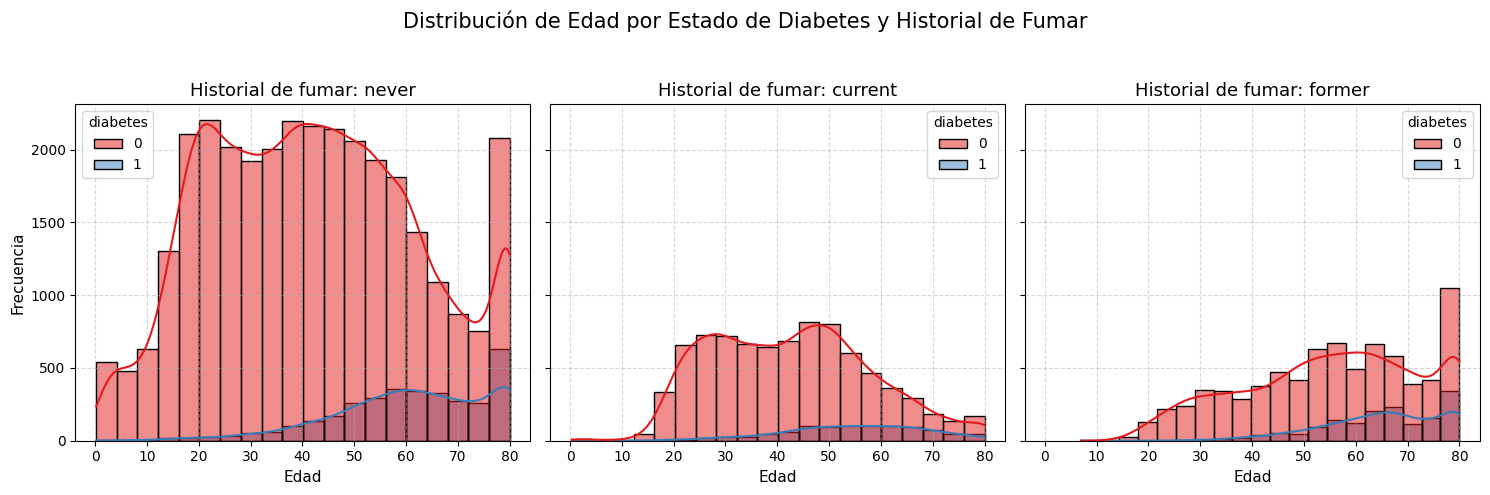

In [13]:
# Crear la figura con 3 subplots (no fumadores, fumadores actuales, ex-fumadores)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True)

# Categorías de fumadores que quieras analizar
smoking_categories = ['never', 'current', 'former']
colors = ['lightcoral', 'mediumseagreen', 'cornflowerblue']

# Generar el histograma + KDE para cada categoría de fumador
for ax, smoker, color in zip(axes, smoking_categories, colors):
    subset = data[data['smoking_history'] == smoker]
    
    sns.histplot(
        data=subset,
        x='age',
        hue='diabetes',      # Diferenciar por diabetes (0 y 1)
        kde=True,
        bins=20,
        edgecolor='black',
        palette='Set1',
        ax=ax
    )
    
    ax.set_title(f"Historial de fumar: {smoker}", fontsize=13)
    ax.set_xlabel('Edad', fontsize=11)
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)

# Título general y ajustes de layout
plt.suptitle('Distribución de Edad por Estado de Diabetes y Historial de Fumar', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


Nunca fumadores (never): Representa la población más numerosa con distribución amplia desde jóvenes hasta adultos mayores. Los casos diabéticos (azul) muestran el patrón típico de concentración en edades avanzadas, pero con números absolutos considerables debido al gran tamaño de esta subpoblación.

Fumadores actuales (current): Constituye la población más pequeña con distribución concentrada principalmente en edades medias (20-60 años). Los casos diabéticos son proporcionalmente más frecuentes en edades más tempranas comparado con nunca fumadores, sugiriendo un efecto acelerador del tabaquismo sobre el desarrollo diabético.

Ex-fumadores (former): Muestra un patrón intermedio con mayor concentración en edades avanzadas (40-80 años). Los casos diabéticos presentan una distribución más amplia por grupos etarios, con presencia notable desde mediana edad hasta adultos mayores.

Los fumadores actuales desarrollan diabetes a edades más tempranas con mayor frecuencia relativa, mientras que los ex-fumadores mantienen riesgo elevado persistente en edades avanzadas. Los nunca fumadores, aunque representan la mayoría absoluta de casos diabéticos por su volumen poblacional, muestran el patrón de riesgo más predecible concentrado en edades muy avanzadas. Esto confirma que el tabaquismo actúa como un acelerador del riesgo diabético, adelantando la edad de aparición y manteniendo efectos residuales incluso después de la cesación.

## Distribucion de variables clinicas por estado de diabetes

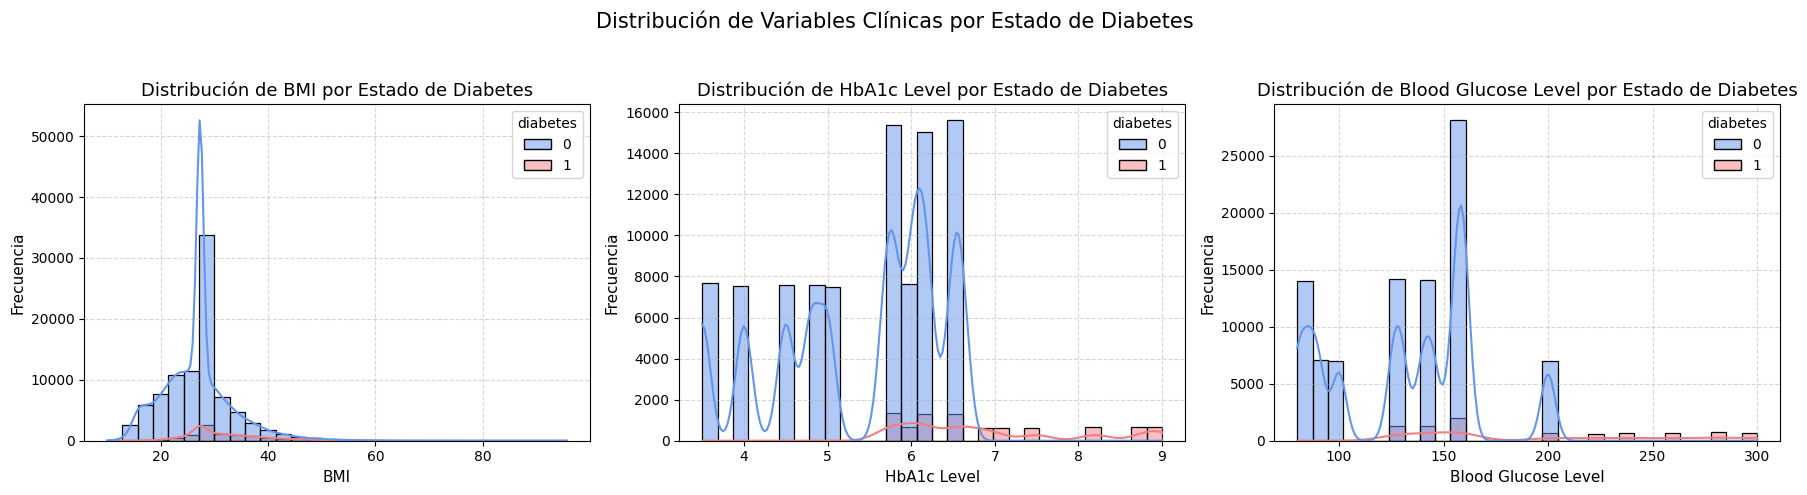

In [14]:

# Crear la figura con 3 subplots (BMI, HbA1c, Glucosa)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=False)

# Variables a graficar
variables = ['bmi', 'hbA1c_level', 'blood_glucose_level']
titles = ['BMI', 'HbA1c Level', 'Blood Glucose Level']
colors = ['cornflowerblue', 'lightcoral']  # Para diabetes (0 y 1)

# Generar el histograma + KDE para cada variable
for ax, var, title in zip(axes, variables, titles):
    sns.histplot(
        data=data,
        x=var,
        hue='diabetes',      # Diferenciar por estado de diabetes
        kde=True,
        bins=30,
        edgecolor='black',
        palette=colors,
        ax=ax
    )
    ax.set_title(f'Distribución de {title} por Estado de Diabetes', fontsize=13)
    ax.set_xlabel(title, fontsize=11)
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)

# Título general y ajustes de layout
plt.suptitle('Distribución de Variables Clínicas por Estado de Diabetes', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()



Los no diabéticos (azul) muestran distribuciones extremadamente concentradas en rangos normales: BMI ~25-27, HbA1c ~5.5-6.0%, y glucosa ~100-140 mg/dL con picos masivos. Los diabéticos (rojo) presentan distribuciones más amplias y desplazadas hacia valores patológicos: BMI 30-40, HbA1c con patrón bimodal (algunos controlados, otros descontrolados), y glucosa dispersa entre 150-300+ mg/dL.

Las tres variables revelan separación clara pero con superposición significativa entre grupos. Los no diabéticos se concentran intensamente en valores fisiológicos normales, mientras los diabéticos muestran heterogeneidad metabólica con casos desde bien controlados hasta severamente descompensados.

## BoxPlot de glucosa, edad y BMI con respecto al estado de diabetes

/var/folders/sg/xwmwcvt547n65vbfwqpp94mm0000gn/T/ipykernel_9097/2910271504.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='blood_glucose_level', data=data,
/var/folders/sg/xwmwcvt547n65vbfwqpp94mm0000gn/T/ipykernel_9097/2910271504.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='age', data=data,
/var/folders/sg/xwmwcvt547n65vbfwqpp94mm0000gn/T/ipykernel_9097/2910271504.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='bmi', data=data,


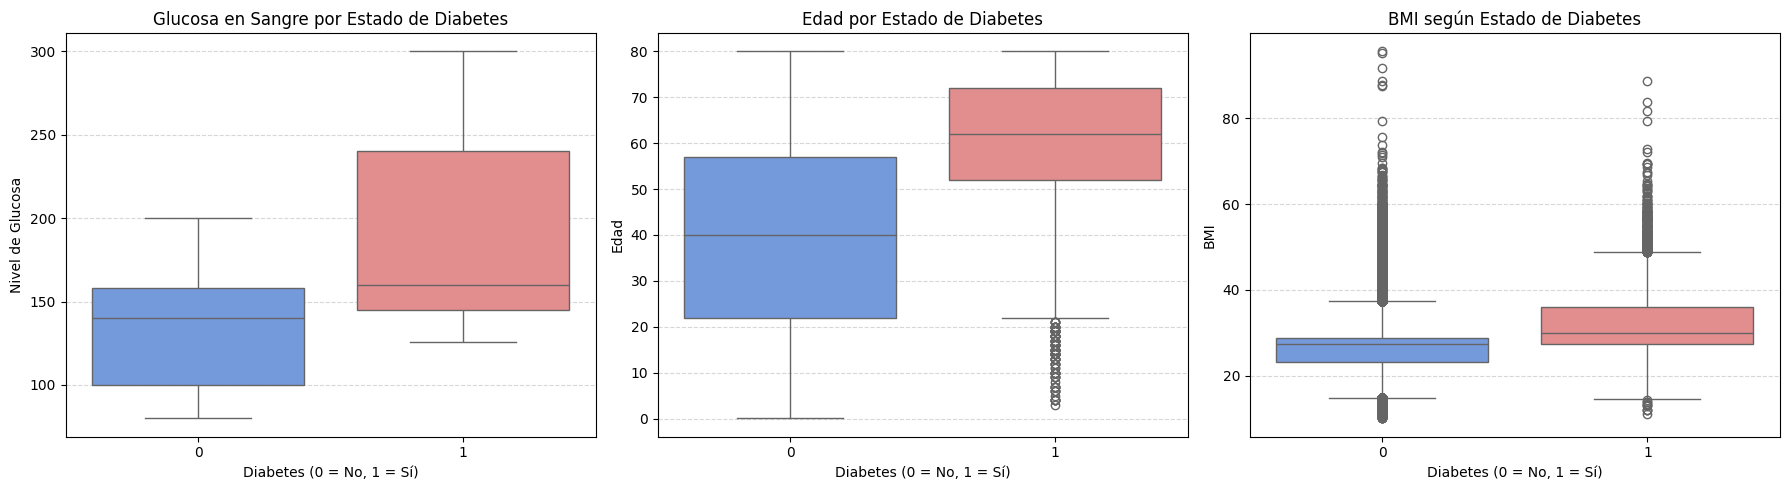

In [15]:
# Crear figura con 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True)

# 1. Glucosa en sangre
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data,
            palette=['cornflowerblue', 'lightcoral'], ax=axes[0])
axes[0].set_title('Glucosa en Sangre por Estado de Diabetes')
axes[0].set_xlabel('Diabetes (0 = No, 1 = Sí)')
axes[0].set_ylabel('Nivel de Glucosa')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# 2. Edad
sns.boxplot(x='diabetes', y='age', data=data,
            palette=['cornflowerblue', 'lightcoral'], ax=axes[1])
axes[1].set_title('Edad por Estado de Diabetes')
axes[1].set_xlabel('Diabetes (0 = No, 1 = Sí)')
axes[1].set_ylabel('Edad')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# 3. BMI
sns.boxplot(x='diabetes', y='bmi', data=data,
            palette=['cornflowerblue', 'lightcoral'], ax=axes[2])
axes[2].set_title('BMI según Estado de Diabetes')
axes[2].set_xlabel('Diabetes (0 = No, 1 = Sí)')
axes[2].set_ylabel('BMI')
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Glucosa sanguínea (izquierda): Los no diabéticos muestran mediana ~140 mg/dL con rango intercuartílico compacto (100-160), mientras los diabéticos presentan mediana ~180 mg/dL con distribución más amplia (150-240) y valores extremos hasta 300 mg/dL, indicando separación clara entre grupos.

Edad (centro): Los no diabéticos exhiben mediana ~40 años con amplio rango (20-60), mientras los diabéticos muestran mediana ~62 años con concentración en edades avanzadas (52-72) y múltiples outliers jóvenes, confirmando que la diabetes es predominantemente geriátrica con casos excepcionales tempranos.

BMI (derecha): Los no diabéticos presentan mediana ~25 kg/m² con distribución muy compacta (23-27) y abundantes outliers superiores, mientras los diabéticos muestran mediana ~33 kg/m² con rango más amplio (30-37), evidenciando asociación fuerte entre obesidad y diabetes.

diferencias sistemáticas y significativas entre grupos diabéticos y no diabéticos en las tres variables clave. La glucosa muestra la mayor separación con mínima superposición, la edad confirma el patrón geriátrico de la diabetes con casos excepcionales jóvenes, y el BMI demuestra asociación clara con obesidad. Las distribuciones más compactas en no diabéticos versus mayor variabilidad en diabéticos sugieren heterogeneidad metabólica en la población diabética, validando estas variables como predictores robustos para discriminación entre estados de salud metabólica

## Matriz de correlacion o mapa de calor de todas las varibles 

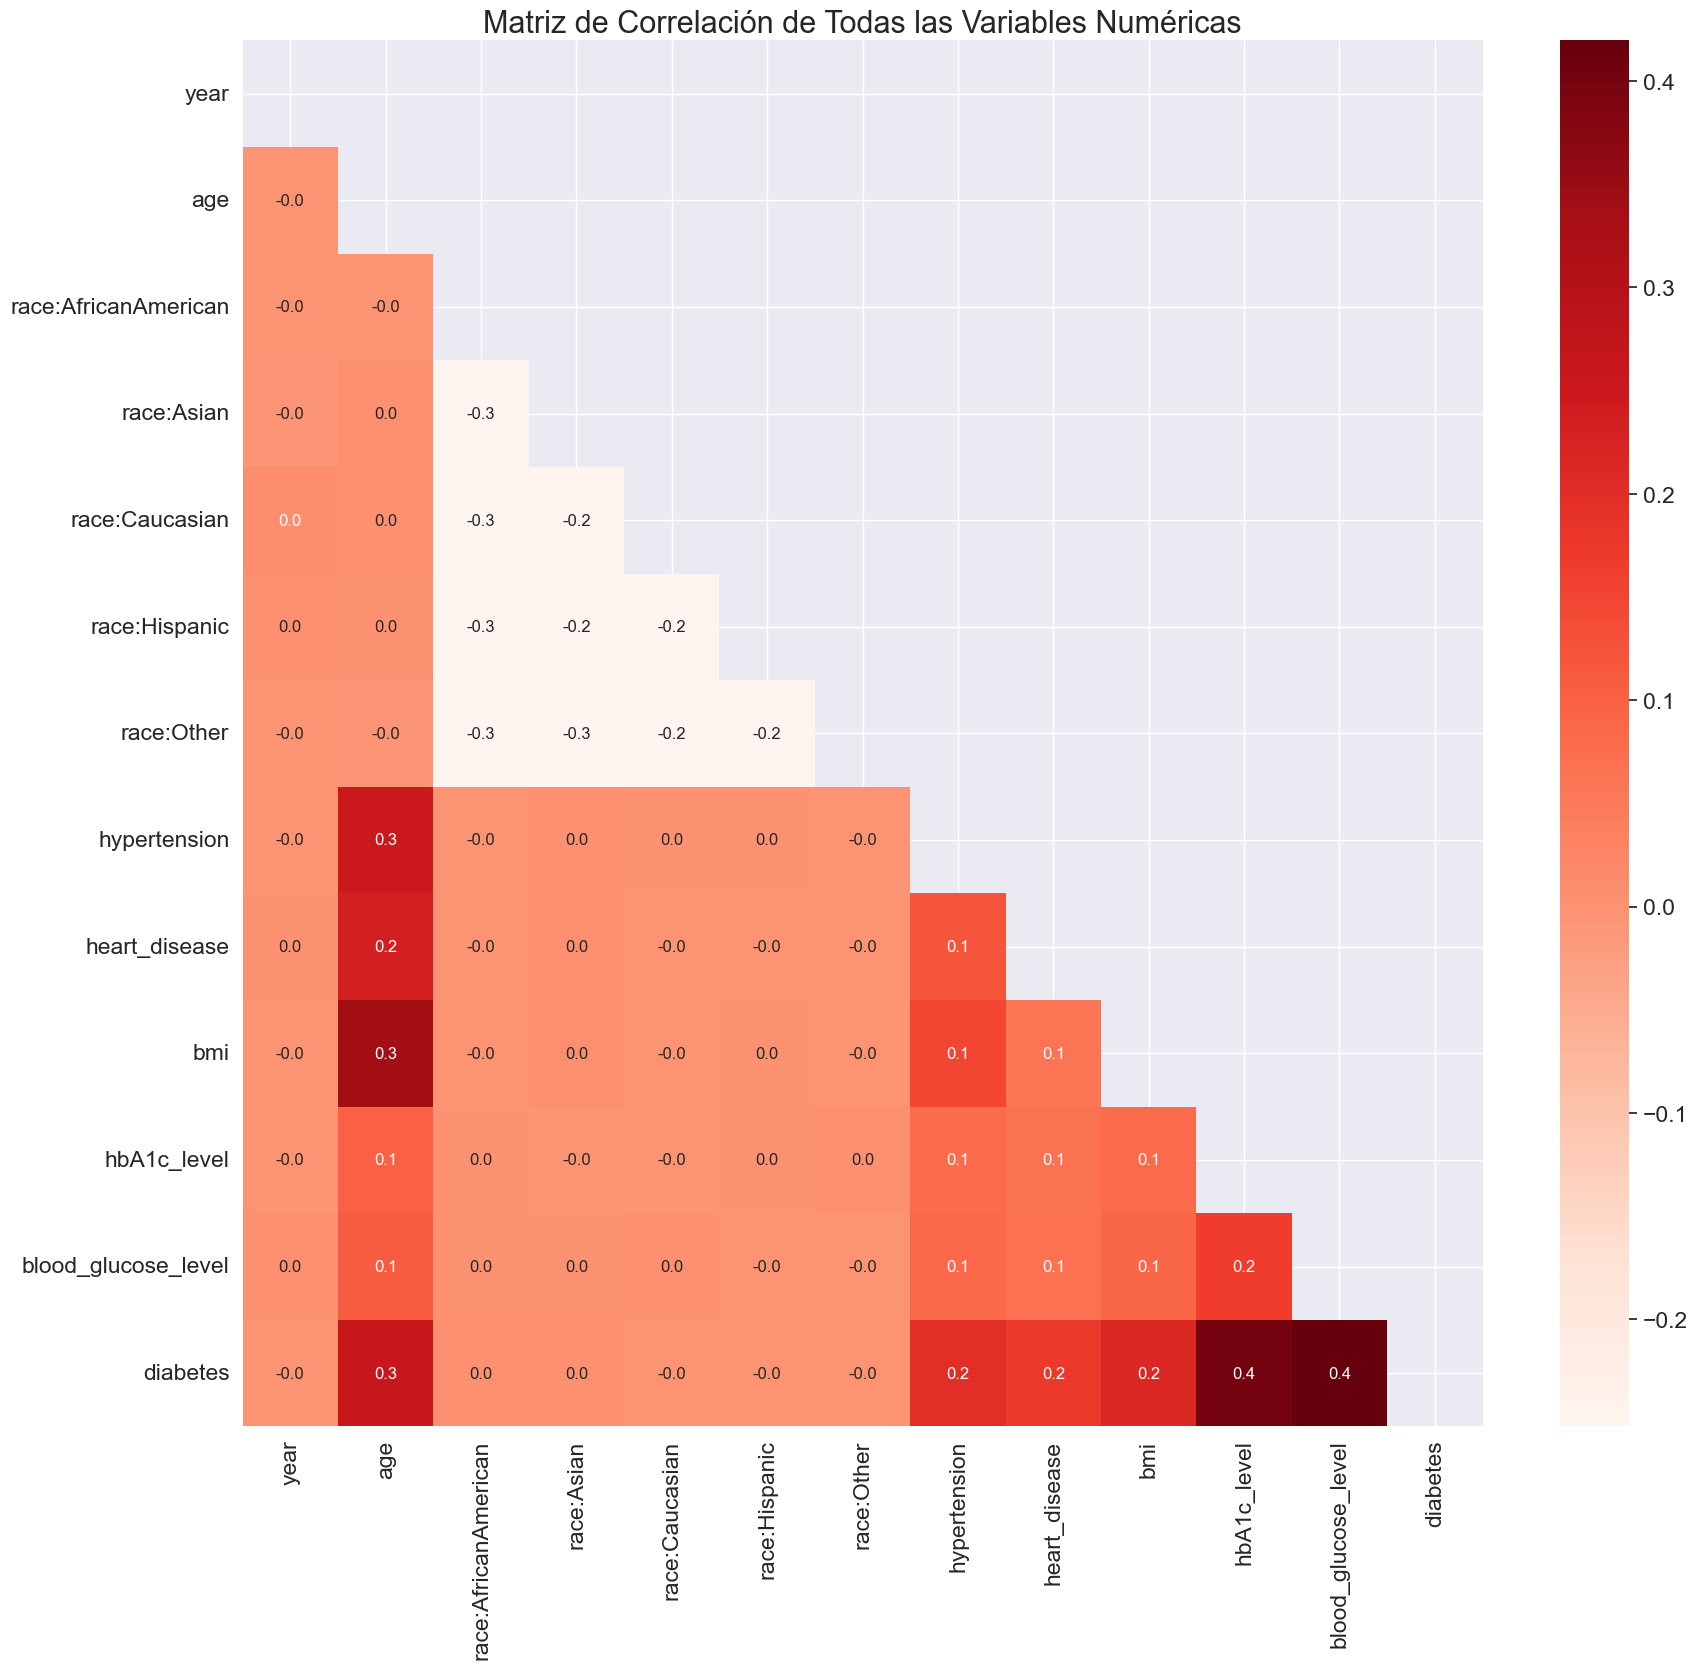

In [16]:

corr = data.select_dtypes(include=['int64', 'float64']).corr()


mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


sns.set(font_scale=1.5)
plt.figure(figsize=(20, 18))


sns.heatmap(
    corr,
    mask=mask,
    cbar=True,
    fmt=".1f",
    annot=True,
    annot_kws={"size": 12},
    cmap="Reds"
)
plt.title("Matriz de Correlación de Todas las Variables Numéricas", fontsize=22)
plt.show()

Los datos revelan un patrón epidemiológico consistente donde las condiciones metabólicas (diabetes, hipertensión, obesidad) están fuertemente interrelacionadas y tienden a coexistir. La diabetes emerge como la variable más conectada en la red de correlaciones, actuando como un indicador central de salud metabólica. Las variables demográficas muestran el comportamiento estadístico esperado, mientras que las medidas temporales (año) parecen no influir significativamente en las correlaciones de salud observadas.

Por lo tanto se toma como referencia las variables numericas para la correlacion

## Matriz de Correlacion para varibles de numericas

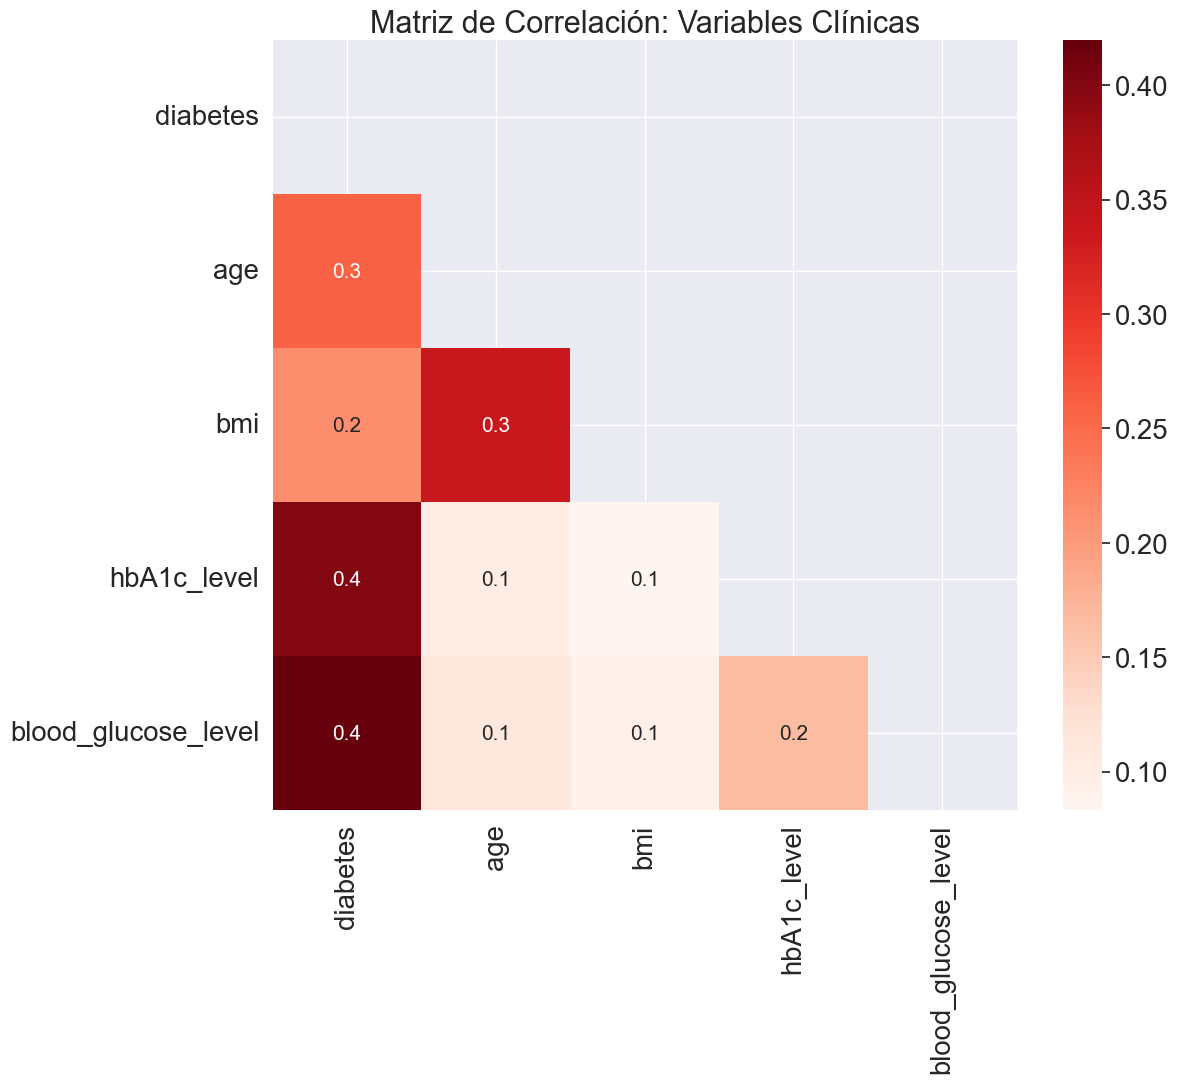

In [17]:
# Seleccionar solo las columnas específicas
cols = ["diabetes", "age", "bmi", "hbA1c_level", "blood_glucose_level"]
corr = data[cols].corr()

# Crear máscara para mostrar solo el triángulo inferior
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Graficar
sns.set(font_scale=1.8)
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cbar=True,
    fmt=".1f",
    annot=True,
    annot_kws={"size": 15},
    cmap="Reds"
)
plt.title("Matriz de Correlación: Variables Clínicas", fontsize=22)
plt.show()

Esta matriz revela una jerarquía clara en las correlaciones clínicas: los biomarcadores específicos de glucosa (HbA1c y glucosa en sangre) dominan la relación con diabetes, mientras que factores como BMI y edad muestran asociaciones más débiles. La baja correlación entre BMI y los marcadores glucémicos sugiere que la obesidad y el control glucémico, aunque relacionados con diabetes, pueden seguir patrones independientes en esta población. La edad actúa como un factor de riesgo general que se correlaciona tanto con condiciones metabólicas.

## Graficas de densidades de edad y BMI por estado de diabetes 

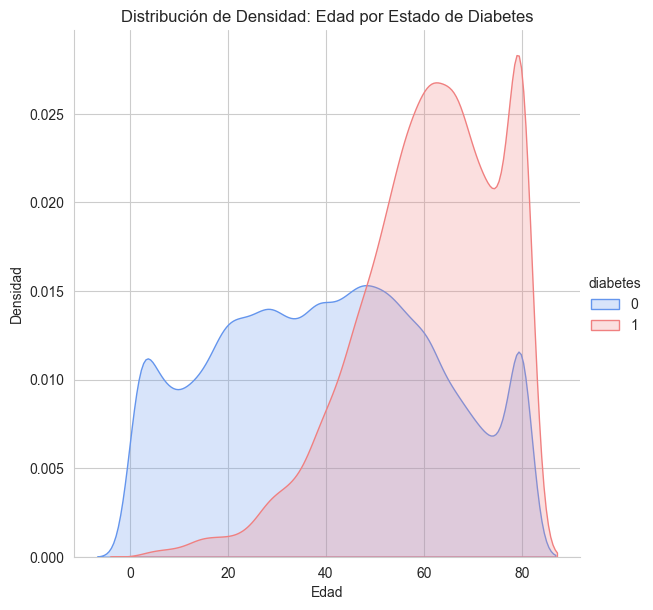

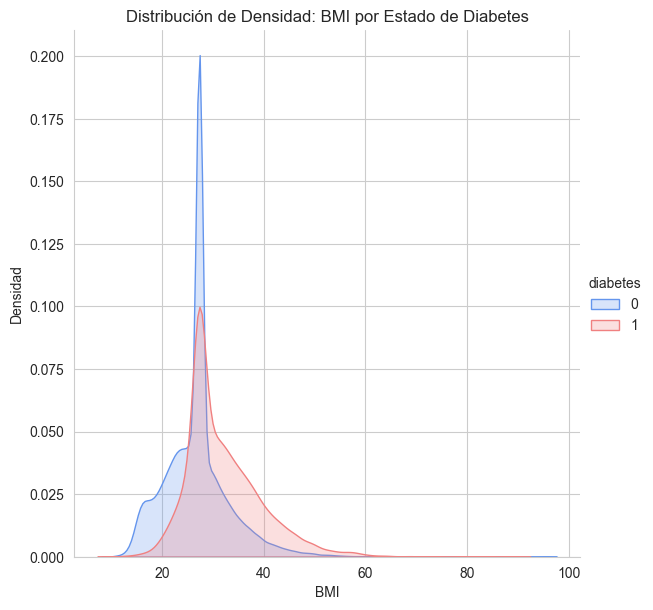

In [18]:
# Restaurar configuraciones
plt.rcdefaults()
sns.set_style("whitegrid")

# --- Diagrama de densidad para Edad ---
g1 = sns.FacetGrid(data, hue="diabetes", height=6, palette=["cornflowerblue", "lightcoral"])
g1.map(sns.kdeplot, "age", fill=True).add_legend()
plt.title("Distribución de Densidad: Edad por Estado de Diabetes")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

# --- Diagrama de densidad para BMI ---
g2 = sns.FacetGrid(data, hue="diabetes", height=6, palette=["cornflowerblue", "lightcoral"])
g2.map(sns.kdeplot, "bmi", fill=True).add_legend()
plt.title("Distribución de Densidad: BMI por Estado de Diabetes")
plt.xlabel("BMI")
plt.ylabel("Densidad")
plt.show()

Distribución de Edad por Estado de Diabetes:
Población sin diabetes (azul):

Distribución más amplia y uniforme desde edades jóvenes hasta los 80 años
Picos múltiples sugieren una población diversa en edad
Mayor representación en edades jóvenes (0-40 años)

Población con diabetes (rojo):

Distribución claramente sesgada hacia edades mayores
Pico principal concentrado entre 60-80 años
Pico secundario alrededor de los 75 años
Prácticamente ausente en edades menores a 40 años

Distribución de BMI por Estado de Diabetes:
Población sin diabetes (azul):

Distribución con pico muy pronunciado alrededor de BMI 25-30
Cola derecha extendida pero con densidad decreciente
Concentración principal en rangos de peso normal a sobrepeso

Población con diabetes (rojo):

Distribución más amplia y desplazada hacia valores de BMI más altos
Pico principal alrededor de BMI 30-35
Distribución más extendida hacia valores extremos de BMI

Los gráficos revelan dos patrones epidemiológicos claros: la diabetes muestra una fuerte asociación con el envejecimiento, concentrándose predominantemente en la población de 60+ años, mientras que en términos de BMI, existe un desplazamiento hacia valores más altos en la población diabética. La separación de las distribuciones es más marcada para la edad que para el BMI, sugiriendo que la edad es un factor diferenciador más fuerte entre poblaciones diabéticas y no diabéticas que el índice de masa corporal en esta muestra.

/var/folders/sg/xwmwcvt547n65vbfwqpp94mm0000gn/T/ipykernel_9097/1900378721.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(
/var/folders/sg/xwmwcvt547n65vbfwqpp94mm0000gn/T/ipykernel_9097/1900378721.py:19: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


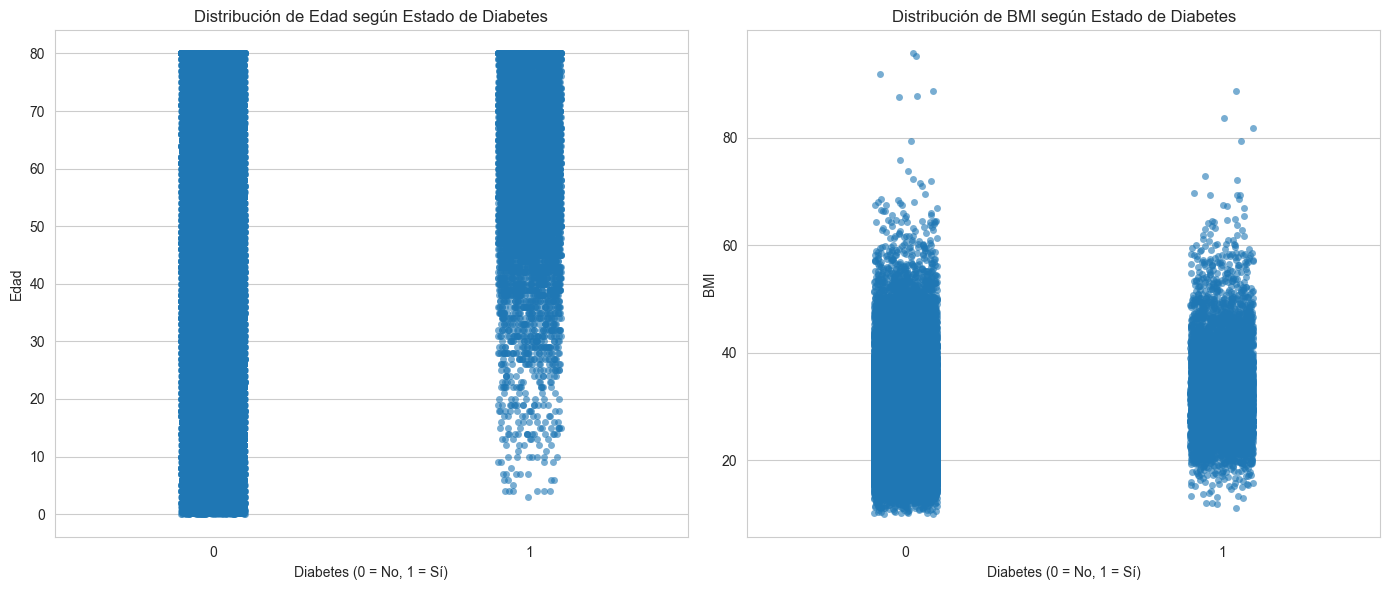

In [19]:

# Crear figura con dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Stripplot de Edad vs Diabetes
sns.stripplot(
    x="diabetes",
    y="age",
    data=data,
    jitter=True,
    edgecolor="gray",
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Distribución de Edad según Estado de Diabetes")
axes[0].set_xlabel("Diabetes (0 = No, 1 = Sí)")
axes[0].set_ylabel("Edad")

# Stripplot de BMI vs Diabetes
sns.stripplot(
    x="diabetes",
    y="bmi",
    data=data,
    jitter=True,
    edgecolor="gray",
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title("Distribución de BMI según Estado de Diabetes")
axes[1].set_xlabel("Diabetes (0 = No, 1 = Sí)")
axes[1].set_ylabel("BMI")

plt.tight_layout()
plt.show()


In [20]:

# 1. Definir X e y
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# 2. Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# 3. Escalar numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)